In [1]:
import pickle
from concurrent.futures import ProcessPoolExecutor, as_completed
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-ipd.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
THRESHOLDS = [
    0.99,
    0.98,
    0.97,
    0.96,
    0.95,
    0.94,
    0.93,
    0.92,
    0.91,
    0.9,
    0.875,
    0.85,
    0.825,
    0.8,
    0.7,
    0.6,
    0.5,
    0.4,
    0.3,
    0.2,
    0.1,
]

In [4]:
rows = []

for (population, lb, t), weights_collection in tqdm(data["train_weights"].items()):
    for weights in weights_collection:
        Gs, edge_counts, clustering_coefficients = get_graphs_at_thresholds(
            weights, THRESHOLDS
        )

        for threshold, edge_count, clustering_coefficient in zip(
            THRESHOLDS, edge_counts, clustering_coefficients
        ):
            rows.append([population, lb, threshold, edge_count, clustering_coefficient])


df = pd.DataFrame(
    rows,
    columns=[
        "population",
        "lookback",
        "threshold",
        "edge_count",
        "clustering_coefficient",
    ],
)

df

  0%|          | 0/30 [00:00<?, ?it/s]

population  lookback  threshold  edge_count  clustering_coefficient
0              16         1       0.99           0                     NaN
1              16         1       0.98           0                     NaN
2              16         1       0.97           0                     NaN
3              16         1       0.96           0                     NaN
4              16         1       0.95           0                     NaN
...           ...       ...        ...         ...                     ...
12595         512         5       0.50      119263                0.915449
12596         512         5       0.40      121377                0.929526
12597         512         5       0.30      122134                0.934814
12598         512         5       0.20      122400                0.936645
12599         512         5       0.10      122565                0.937764

[12600 rows x 5 columns]

In [5]:
df.to_csv("analysis/ipd_clustering_data.csv")

In [ ]:
# THRESHOLDS = [0.99, 0.975, 0.95, 0.925, 0.9, 0.875, 0.85, 0.825, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# THRESHOLDS = [0.975, 0.95, 0.925, 0.9]

THRESHOLDS = [t / 100 for t in reversed(range(100))]

Gs, edge_counts, clustering_coefficients = get_graphs_at_thresholds(
    data["train_weights"][(256, 3, 0.1)][0], THRESHOLDS
)

plt.xlim(left=0, right=1)
plt.xlabel("Threshold")
plt.ylabel("Edge Count")
plt.plot(THRESHOLDS, edge_counts)
plt.show()

plt.xlim(left=0, right=1)
plt.xlabel("Threshold")
plt.ylabel("Clustering Coefficient")
plt.plot(THRESHOLDS, clustering_coefficients)
plt.show()

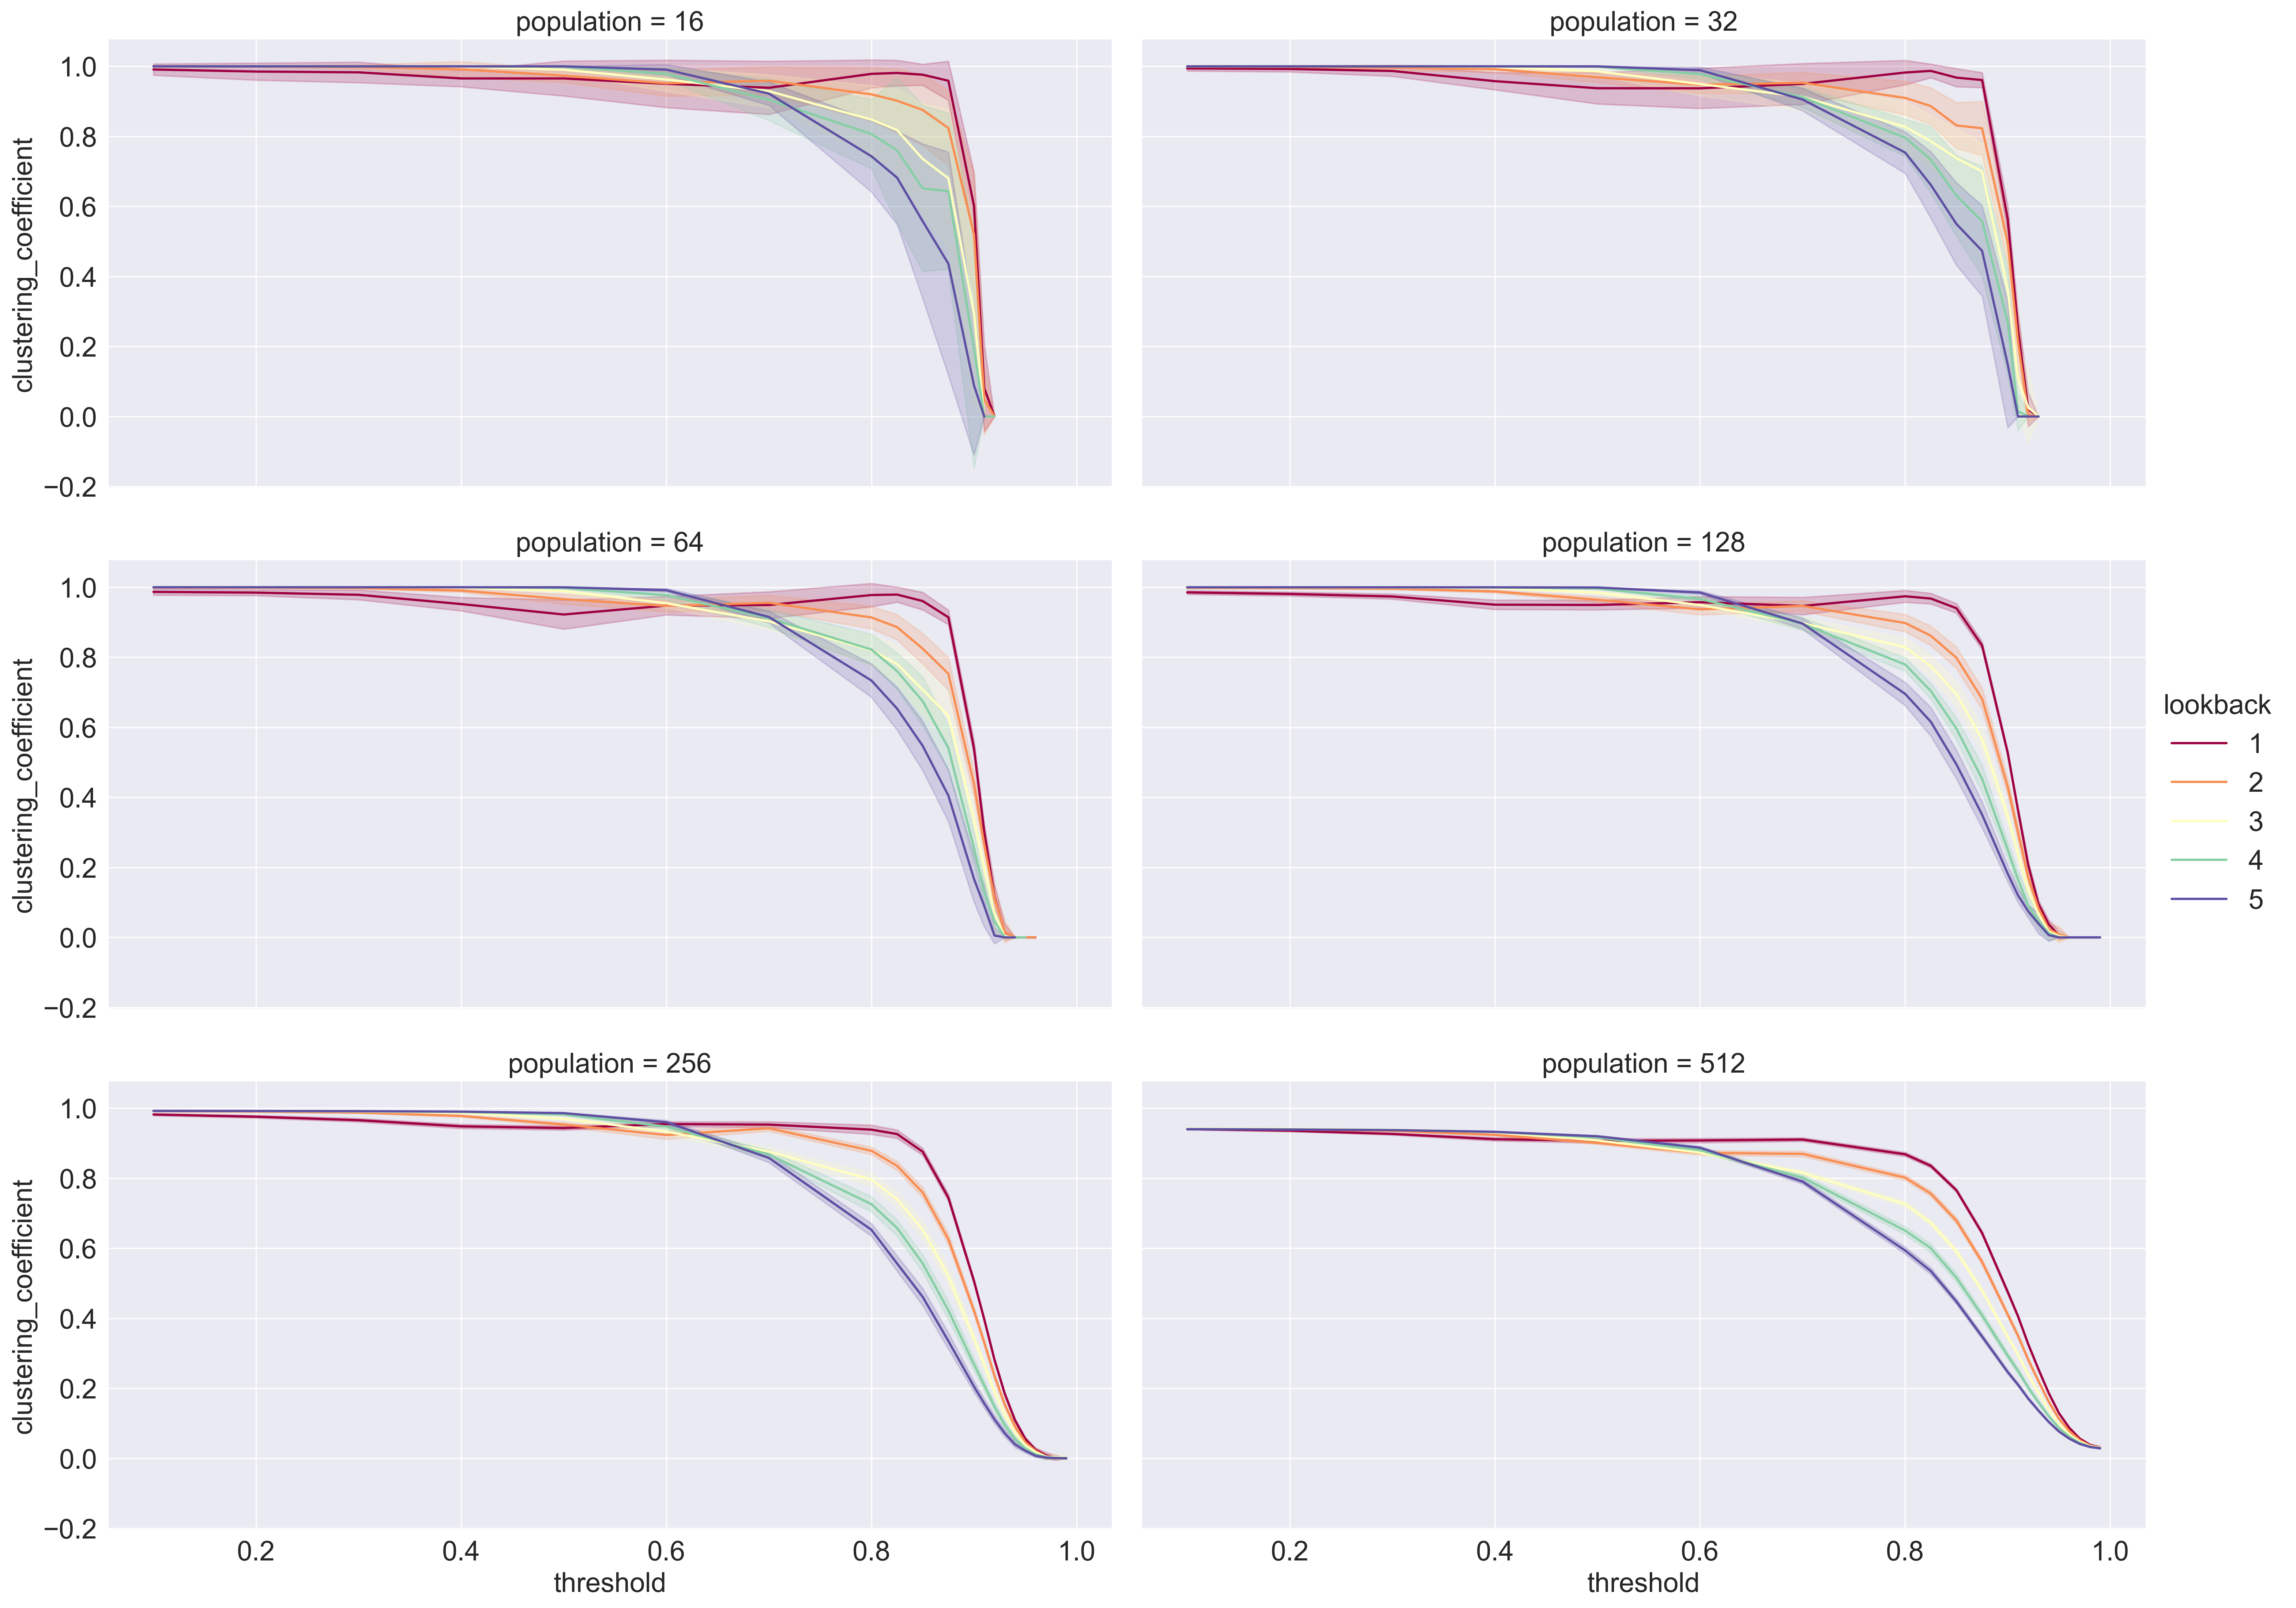

In [56]:
sns.set_style("darkgrid")
sns.relplot(
    data=df,
    x="threshold",
    y="clustering_coefficient",
    hue="lookback",
    col="population",
    col_wrap=2,
    kind="line",
    aspect=2,
    palette="Spectral",
    errorbar="sd",
)

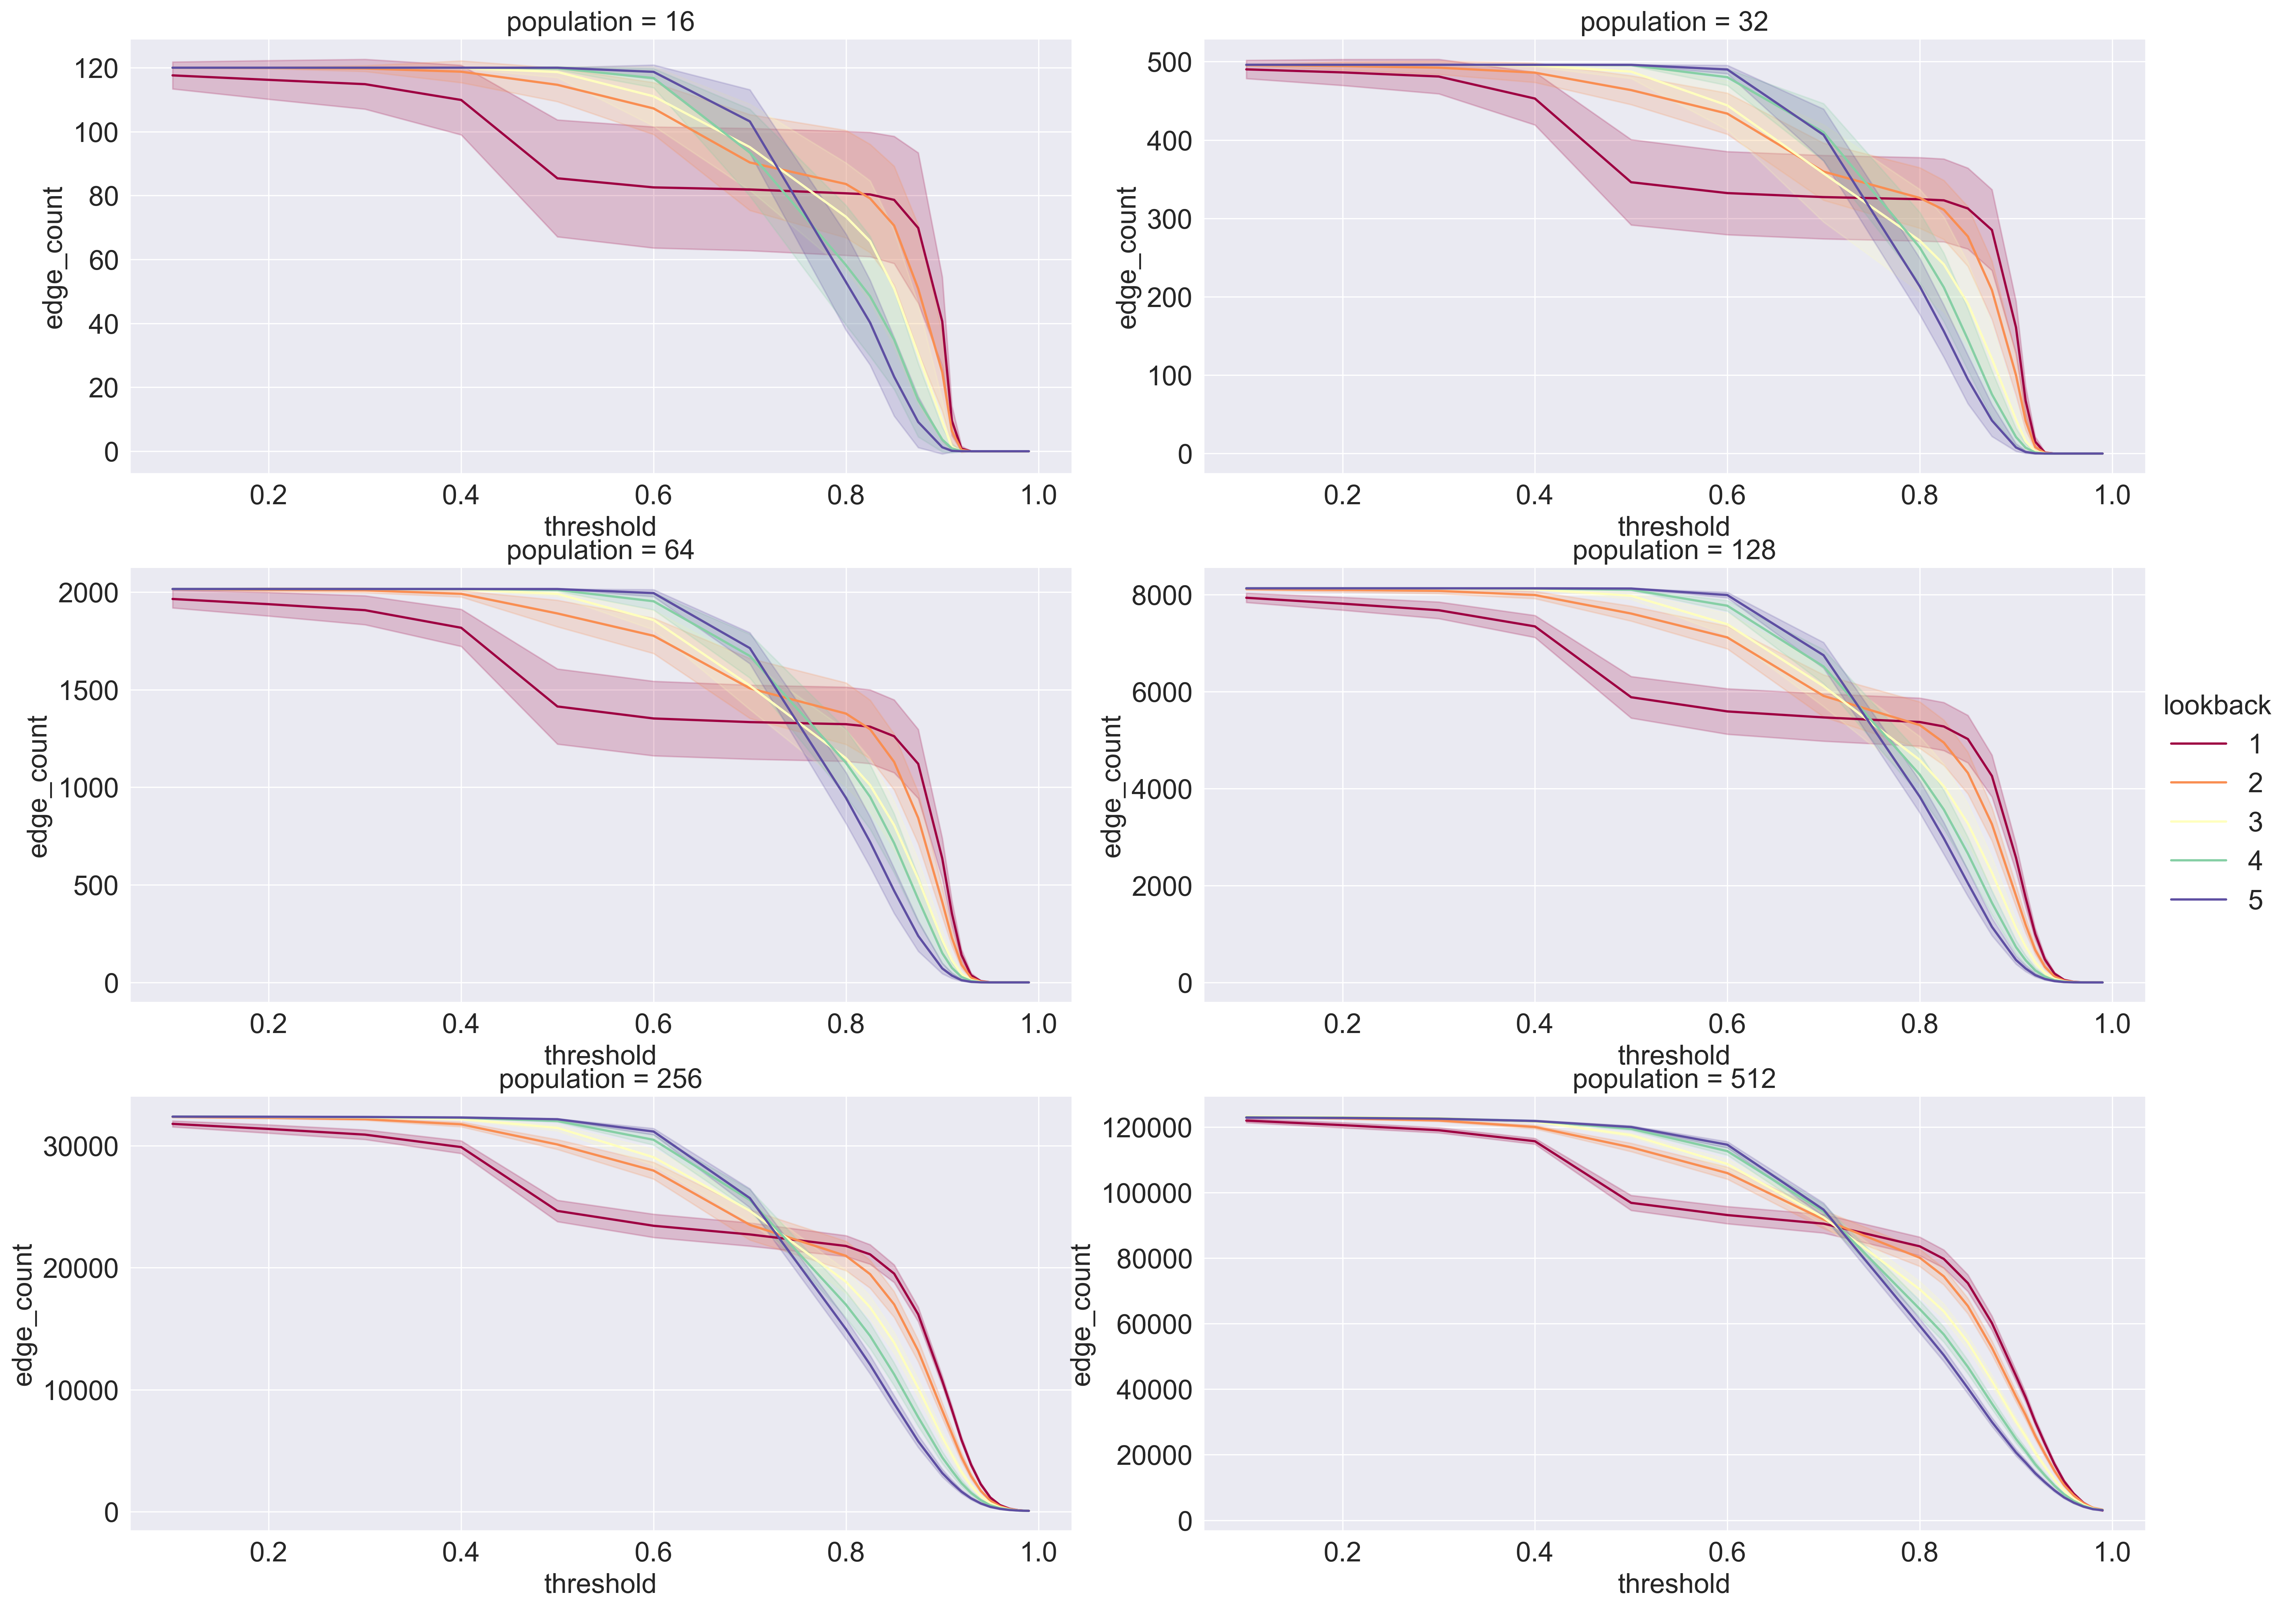

In [55]:
sns.set_style("darkgrid")
sns.relplot(
    data=df,
    x="threshold",
    y="edge_count",
    hue="lookback",
    col="population",
    col_wrap=2,
    kind="line",
    aspect=2,
    palette="Spectral",
    facet_kws={"sharey": False, "sharex": False},
    errorbar="sd",
)

In [52]:
agg_df = (
    df[df["threshold"] == 0.9]
    .groupby(["population", "lookback", "threshold"])
    .agg(
        {
            "clustering_coefficient": ["mean", "std"],
            # "edge_count": ["mean", "std"],
        }
    )
    .round(3)
)

agg_df  # .to_csv("analysis/ipd-clustering-coefficient-aggregated.csv")

clustering_coefficient       
                                                mean    std
population lookback threshold                              
16         1        0.9                        0.601  0.096
           2        0.9                        0.520  0.175
           3        0.9                        0.293  0.253
           4        0.9                        0.192  0.338
           5        0.9                        0.089  0.199
32         1        0.9                        0.563  0.039
           2        0.9                        0.497  0.061
           3        0.9                        0.362  0.102
           4        0.9                        0.269  0.151
           5        0.9                        0.148  0.180
64         1        0.9                        0.540  0.022
           2        0.9                        0.438  0.037
           3        0.9                        0.338  0.043
           4        0.9                        0.255  0.044
           5        0.9                        0.167  0.066
128        1        0.9                        0.527  0.008
           2        0.9                        0.430  0.023
           3        0.9                        0.346  0.021
           4        0.9                        0.251  0.022
           5        0.9                        0.182  0.023
256        1        0.9                        0.506  0.007
           2        0.9                        0.421  0.011
           3        0.9                        0.342  0.018
           4        0.9                        0.268  0.017
           5        0.9                        0.205  0.015
512        1        0.9                        0.475  0.005
           2        0.9                        0.410  0.008
           3        0.9                        0.347  0.008
           4        0.9                        0.293  0.009
           5        0.9                        0.246  0.006

In [53]:
agg_df2 = agg_df.reset_index()

agg_df2.pivot("population", columns="lookback")

C:\Users\jerem\AppData\Local\Temp/ipykernel_5484/4112753822.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  agg_df2.pivot("population", columns="lookback")


threshold                     clustering_coefficient                \
                                                           mean                 
lookback           1    2    3    4    5                      1      2      3   
population                                                                      
16               0.9  0.9  0.9  0.9  0.9                  0.601  0.520  0.293   
32               0.9  0.9  0.9  0.9  0.9                  0.563  0.497  0.362   
64               0.9  0.9  0.9  0.9  0.9                  0.540  0.438  0.338   
128              0.9  0.9  0.9  0.9  0.9                  0.527  0.430  0.346   
256              0.9  0.9  0.9  0.9  0.9                  0.506  0.421  0.342   
512              0.9  0.9  0.9  0.9  0.9                  0.475  0.410  0.347   

                                                             
                            std                              
lookback        4      5      1      2      3      4      5  
population                                                   
16          0.192  0.089  0.096  0.175  0.253  0.338  0.199  
32          0.269  0.148  0.039  0.061  0.102  0.151  0.180  
64          0.255  0.167  0.022  0.037  0.043  0.044  0.066  
128         0.251  0.182  0.008  0.023  0.021  0.022  0.023  
256         0.268  0.205  0.007  0.011  0.018  0.017  0.015  
512         0.293  0.246  0.005  0.008  0.008  0.009  0.006

In [54]:
for population, row in (
    agg_df2[agg_df2["threshold"] == 0.9]
    .pivot("population", columns="lookback")
    .iterrows()
):
    print(
        population,
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["clustering_coefficient"]["mean"],
                row["clustering_coefficient"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.601 \pm 0.096$	&	$0.520 \pm 0.175$	&	$0.293 \pm 0.253$	&	$0.192 \pm 0.338$	&	$0.089 \pm 0.199$ \\
32	&	$0.563 \pm 0.039$	&	$0.497 \pm 0.061$	&	$0.362 \pm 0.102$	&	$0.269 \pm 0.151$	&	$0.148 \pm 0.180$ \\
64	&	$0.540 \pm 0.022$	&	$0.438 \pm 0.037$	&	$0.338 \pm 0.043$	&	$0.255 \pm 0.044$	&	$0.167 \pm 0.066$ \\
128	&	$0.527 \pm 0.008$	&	$0.430 \pm 0.023$	&	$0.346 \pm 0.021$	&	$0.251 \pm 0.022$	&	$0.182 \pm 0.023$ \\
256	&	$0.506 \pm 0.007$	&	$0.421 \pm 0.011$	&	$0.342 \pm 0.018$	&	$0.268 \pm 0.017$	&	$0.205 \pm 0.015$ \\
512	&	$0.475 \pm 0.005$	&	$0.410 \pm 0.008$	&	$0.347 \pm 0.008$	&	$0.293 \pm 0.009$	&	$0.246 \pm 0.006$ \\


C:\Users\jerem\AppData\Local\Temp/ipykernel_5484/2851455137.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  for population, row in agg_df2[agg_df2["threshold"] == 0.9].pivot("population", columns="lookback").iterrows():
